In [ ]:
!unzip dataset.zip

In [ ]:
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import seaborn as sn
import matplotlib.pyplot as plt
import pandas as pd
import cv2
import imutils
from imutils.contours import sort_contours
import math

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   validation_split=0.2)
training_set = train_datagen.flow_from_directory('extracted_images',subset="training",shuffle=True,target_size = (45,45),
                                                 batch_size = 32,class_mode = 'categorical',color_mode="grayscale")

testing_set = train_datagen.flow_from_directory('extracted_images',subset="validation",shuffle=True,target_size = (45,45),
                                                 batch_size = 32,class_mode = 'categorical',color_mode="grayscale")

Found 150764 images belonging to 20 classes.
Found 37681 images belonging to 20 classes.


TypeError: ignored

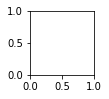

In [ ]:
X_train,y_train = training_set.next()
for i in range(9):
    # define subplot
    plt.subplot(330 + 1 + i)
    # plot raw pixel data
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
# show the figure
plt.show()

In [ ]:
print(training_set.class_indices)

{'(': 0, ')': 1, '+': 2, '-': 3, '0': 4, '1': 5, '2': 6, '3': 7, '4': 8, '5': 9, '6': 10, '7': 11, '8': 12, '9': 13, '[': 14, ']': 15, 'div': 16, 'times': 17, '{': 18, '}': 19}


In [ ]:
cnn = tf.keras.models.Sequential()
#cnn.add(tf.keras.layers.ZeroPadding2D(padding=(2, 2)))
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[32,32,1]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Dropout(0.2))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))
#cnn.add(tf.keras.layers.Dense(units=50, activation='relu'))
cnn.add(tf.keras.layers.Dense(units=20, activation='softmax'))
cnn.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
hist = cnn.fit(x = training_set,validation_data = testing_set,epochs = 15)

Epoch 1/15
4712/4712 [==============================] - 247s 52ms/step - loss: 0.4543 - accuracy: 0.8667 - val_loss: 0.2382 - val_accuracy: 0.9285
Epoch 2/15
4712/4712 [==============================] - 249s 53ms/step - loss: 0.2316 - accuracy: 0.9306 - val_loss: 0.1733 - val_accuracy: 0.9485
Epoch 3/15
4712/4712 [==============================] - 252s 54ms/step - loss: 0.1911 - accuracy: 0.9417 - val_loss: 0.1518 - val_accuracy: 0.9544
Epoch 4/15
4712/4712 [==============================] - 252s 54ms/step - loss: 0.1689 - accuracy: 0.9478 - val_loss: 0.1362 - val_accuracy: 0.9586
Epoch 5/15
4712/4712 [==============================] - 252s 53ms/step - loss: 0.1588 - accuracy: 0.9504 - val_loss: 0.1243 - val_accuracy: 0.9615
Epoch 6/15
4712/4712 [==============================] - 263s 56ms/step - loss: 0.1463 - accuracy: 0.9545 - val_loss: 0.1166 - val_accuracy: 0.9644
Epoch 7/15
4712/4712 [==============================] - 264s 56ms/step - loss: 0.1379 - accuracy: 0.9564 - val_loss: 0

In [ ]:
cnn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 30, 30, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 13, 13, 32)        9248      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 6, 6, 32)         0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 6, 6, 32)          0         
                                                                 
 flatten_2 (Flatten)         (None, 1152)             

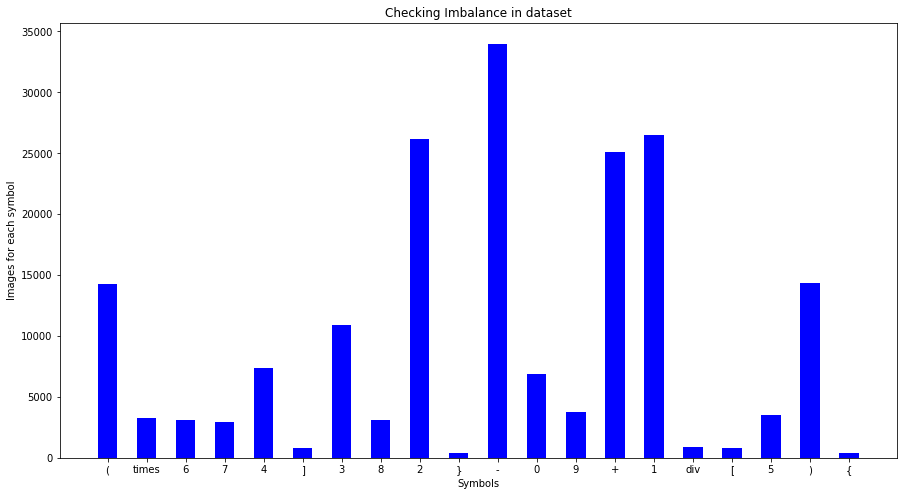

In [ ]:
import os
APP_FOLDER = "dataset"
symbols = []
values = []
for base, dirs, files in os.walk(APP_FOLDER):
    for dirss in dirs:
        symbols.append(dirss)
        list = os.listdir("dataset/"+dirss) # dir is your directory path
        values.append(len(list))

plt.figure(figsize=(15,8))
plt.bar(symbols,values, color ='blue',
        width = 0.5)

plt.xlabel("Symbols")
plt.ylabel("Images for each symbol")
plt.title("Checking Imbalance in dataset")

plt.show()

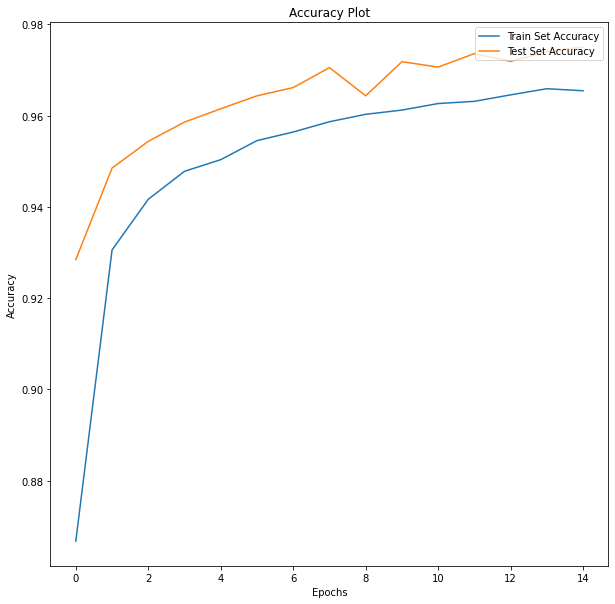

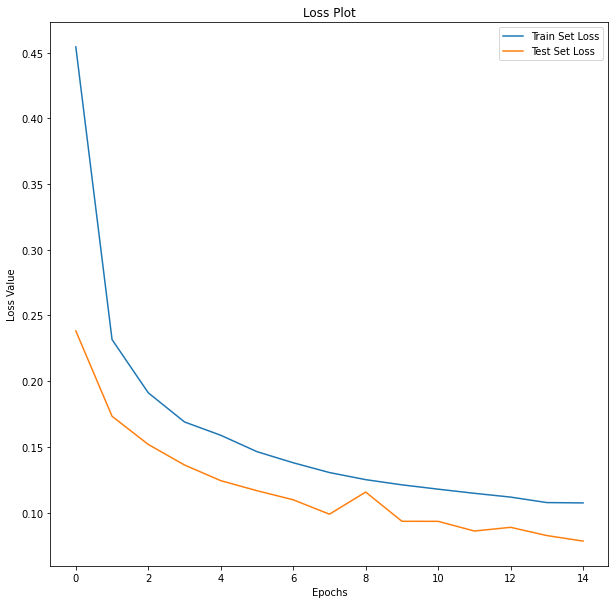

In [ ]:
figure = plt.figure(figsize=(10, 10))
plt.plot(hist.history['accuracy'], label='Train Set Accuracy')
plt.plot(hist.history['val_accuracy'], label='Test Set Accuracy')
plt.title('Accuracy Plot')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='upper right')
plt.show()

figure2 = plt.figure(figsize=(10, 10))
plt.plot(hist.history['loss'], label='Train Set Loss')
plt.plot(hist.history['val_loss'], label='Test Set Loss')
plt.title('Loss Plot')
plt.xlabel('Epochs')
plt.ylabel('Loss Value')
plt.legend(loc='upper right')
plt.show()

In [ ]:
test_image = image.load_img('four.JPG',target_size = (32,32),grayscale=True)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
print(np.argmax(result, axis=1))
print(training_set.class_indices)

[8]
{'(': 0, ')': 1, '+': 2, '-': 3, '0': 4, '1': 5, '2': 6, '3': 7, '4': 8, '5': 9, '6': 10, '7': 11, '8': 12, '9': 13, '[': 14, ']': 15, 'div': 16, 'times': 17, '{': 18, '}': 19}


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


[15]
[7]
[9]
[14]
[17]
[13]
Value of the expression 157914*13 : 2052882


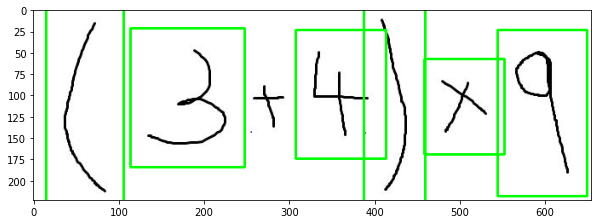

In [ ]:
def prediction(img):
    #img = cv2.imread(img, cv2.IMREAD_GRAYSCALE)
    #plt.imshow(img, cmap = 'gray')
    img = cv2.resize(img,(32,32))
    norm_image = cv2.normalize(img, None, alpha = 0, beta = 1, norm_type = cv2.NORM_MINMAX, dtype = cv2.CV_32F)
    #norm_image=img/255
    norm_image = norm_image.reshape((norm_image.shape[0], norm_image.shape[1], 1))
    case = np.asarray([norm_image])
    pred = cnn.predict([case])
    pred = np.argmax(pred, axis=1)
    print(pred)
    return pred

image = cv2.imread('exp1.JPG')
#image = cv2.resize(image,(300,300))
#Converting the image to grayScale for better accuracy(RGB scale might underfit the data).
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
# perform edge detection, find contours in the edge map, and sort the
# resulting contours from left-to-right
edged = cv2.Canny(blurred, 120, 50)
cnts = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
cnts = sort_contours(cnts, method="left-to-right")[0]
chars=[]
for c in cnts:
    # compute the bounding box of the contour
    (x, y, w, h) = cv2.boundingRect(c)
    # filter out bounding boxes, ensuring they are neither too small
    # nor too large
    if w*h>500 and (h>60 or w>60):
        # extract the character and threshold it to make the character
        # appear as *white* (foreground) on a *black* background, then
        # grab the width and height of the thresholded image
        roi = gray[y-25:y + h+25, x-20:x + w+20]
        chars.append(prediction(roi)[0])
        cv2.rectangle(image, (x-20, y-25), (x + w + 20, y + h+25), (0, 255, 0), 2)

plt.figure(figsize=(10,10))
plt.imshow(image)
e = ''
for i in chars:
    if i==0:
        e += '('
    elif i==1:
        e += ')'
    elif i==2:
        e += '+'
    elif i==16:
        e += '/'
    elif i==17:
        e+='*'
    elif i==3:
        e+='-'
    else:
        e += str(i)
v = eval(e)
print('Value of the expression {} : {}'.format(e, v))

In [ ]:
tf.keras.models.save_model(cnn,'my_model')

In [ ]:
cnn = tf.keras.models.load_model('my_model')